In [1]:
import json
import datetime
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with open('/content/drive/MyDrive/Social Analyzer NLP/posts.json') as json_file:
    data = json_file.read()

In [4]:
data = json.loads(data)

In [5]:
posts_df = pd.DataFrame()
info = []

for i in range(len(data)):
  if "posts" in data[i]:
    if "post_text" in data[i]['posts'][0]:
      
      # Extraer info de posts y agregar a la lista
      post_info = {
          'account' : data[i]['account'],
          'account_id' : data[i]['id'],
          'post_id' : data[i]['posts'][0]['post_id'],
          'post_text' : data[i]['posts'][0]['post_text'],
          'post_timestamp' : datetime.datetime.fromtimestamp(data[i]['posts'][0]['post_timestamp']),
          'comments': data[i]['posts'][0]['comments'],
          'likes': data[i]['posts'][0]['likes']
      }

      info.append(post_info)

# Convertir la lista en DataFrame
posts_df = pd.DataFrame(info)

posts_df['cantidad_comentarios'] = posts_df['comments'].apply(lambda x : len(x))

posts_df

,account,account_id,post_id,post_text,post_timestamp,comments,likes,cantidad_comentarios
0,flgovrondesantis,1653578477036,2845452458431699826,Stopped by Gocki’s Restaurant & Retail in Hava...,2022-05-24 20:33:07,"[{'name': 'whoiselvigmichael', 'text': 'Hi gov...",10196,16
1,flgovrondesantis,1653578477036,2845437737717685019,Our nearly $9 million investment in Gadsden Co...,2022-05-24 20:03:52,"[{'name': 'meaganlbarber', 'text': 'Why don’t ...",6748,24
2,flgovrondesantis,1653578477036,2844705383474708862,Florida is providing $100 million to provide d...,2022-05-23 19:52:36,"[{'name': 'mamaskrammy', 'text': '👏👏👏👏🔥👏👏👏👏'},...",43308,24
3,flgovrondesantis,1653578477036,2842360208151797587,"This Cuban Independence Day, we are proud to r...",2022-05-20 14:10:27,"[{'name': 'sandramarrero09', 'text': 'While he...",22316,22
4,flgovrondesantis,1653578477036,2841928904734945716,"Thank you, Hub City Smokehouse & Grill, for ho...",2022-05-19 23:52:27,"[{'name': 'peggyjones2372', 'text': '👏👏👏😍'}, {...",13289,23
...,...,...,...,...,...,...,...,...
388,flgovrondesantis,1653578477036,2618567928964243591,The people of Cuba are engaged in the noble ca...,2021-07-15 19:36:32,"[{'name': 'misspatperkins', 'text': 'Biden wan...",77552,24
389,flgovrondesantis,1653578477036,2587311426068455309,The Florida Leads Budget cuts taxes by $169 mi...,2021-06-02 16:32:58,"[{'name': 'hardwickmom', 'text': 'Best governo...",59318,24
390,flgovrondesantis,1653578477036,2570112494587915446,Florida recently welcomed home the 202nd Red H...,2021-05-09 23:01:46,"[{'name': 'lovetravel065', 'text': '🔥👏👏👏👏👏👏👏👏👏...",22907,23
391,flgovrondesantis,1653578477036,2565718899557320734,I was proud to sign landmark legislation & two...,2021-05-03 21:32:28,"[{'name': 'lizabancemusic', 'text': '👏👏👏👏👏'}, ...",78378,24


In [6]:
data[i]['posts'][0]

{'caption': 'Congratulations to Dane Eagle of the Department of Economic Opportunity, Simone Marstiller of Agency for Health Care Administration, Julie Brown of the Department of Business and Professional Regulation, John Davis of the Florida Lottery and Shevaun Harris of the Department of Children and Families who were all confirmed as secretaries yesterday by the Florida Senate!',
 'comments': [{'name': 'officialmaddyjune',
   'text': 'Hi, where will tourists stand with the v passports ? Thanks 🙏'},
  {'name': 'melcass2',
   'text': 'Love what you are doing for the state but do you realize how my wasted time is spent in our schools on state test prep and testing. Our kids are missing out on valuable education due to it. You would not want your kids wasting educational time on test prep and then multiple days of testing, it needs to change.'},
  {'name': 'christylena', 'text': 'Unmask children'},
  {'name': 'juanchoesra', 'text': 'Thanks Sir!! 👏👏'},
  {'name': 'maryboca1026', 'text': 

### cantidad de likes y comentarios

In [7]:
posts_df.sort_values(by='likes', ascending=False).head(5)

,account,account_id,post_id,post_text,post_timestamp,comments,likes,cantidad_comentarios
89,flgovrondesantis,1653578477036,2773667947560403263,Happy Valentine’s Day to my better half @FLCas...,2022-02-14 19:30:07,"[{'name': 'joyner.2323', 'text': 'damn.....loo...",342446,20
149,flgovrondesantis,1653578477036,2714795006845066985,Casey and I have a lot to be thankful for this...,2021-11-25 14:00:05,"[{'name': 'drjenjoy', 'text': 'You have the mo...",254769,24
384,flgovrondesantis,1653578477036,2690126396260513714,Thank you for the outpouring of support for Ca...,2021-10-22 13:07:58,"[{'name': 'mrsnicoletta_v', 'text': '👏👏'}, {'n...",219549,24
207,flgovrondesantis,1653578477036,2657744075727797126,In Florida – we back the blue.,2021-09-07 20:50:04,"[{'name': 'stickemupjack', 'text': 'Unless the...",192828,24
79,flgovrondesantis,1653578477036,2783801487189789628,"Last week, the Biden Administration requested ...",2022-02-28 19:03:39,"[{'name': 'smashleyferris', 'text': 'Yeah aren...",187954,21


In [8]:
posts_df.sort_values(by='cantidad_comentarios', ascending=False).head(5)

,account,account_id,post_id,post_text,post_timestamp,comments,likes,cantidad_comentarios
196,flgovrondesantis,1653578477036,2669413464608698140,Joe Biden promised to send 50% more monoclonal...,2021-09-23 23:15:04,"[{'name': 'oliverpugliese', 'text': 'Fix this ...",42815,24
184,flgovrondesantis,1653578477036,2687391302181626665,@FLCaseyDeSantis is going to fight back agains...,2021-10-18 18:39:20,"[{'name': 'kawaiifrenchies', 'text': '❤️❤️❤️🙏'...",45799,24
161,flgovrondesantis,1653578477036,2707105241474632615,Had some great pizza and ice cream with Mason ...,2021-11-14 23:21:54,"[{'name': 'lsquillante1950', 'text': '❤️🤍💙🇺🇸🙏'...",123503,24
367,flgovrondesantis,1653578477036,2553250441271868356,I’m pleased to announce nearly $150 million in...,2021-04-16 16:39:52,"[{'name': 'shreefabbas300', 'text': 'We are wa...",15658,24
163,flgovrondesantis,1653578477036,2704683988782724416,America is the land of the free because of the...,2021-11-11 15:11:38,"[{'name': 'arob1327', 'text': 'F you'}, {'name...",36621,24


Encontramos que solo trae hasta 24 comentarios siendo que hay publicaciones con miles de comentarios.

In [9]:
posts_df.sort_values(by='post_timestamp', ascending=False).head(5)

,account,account_id,post_id,post_text,post_timestamp,comments,likes,cantidad_comentarios
0,flgovrondesantis,1653578477036,2845452458431699826,Stopped by Gocki’s Restaurant & Retail in Hava...,2022-05-24 20:33:07,"[{'name': 'whoiselvigmichael', 'text': 'Hi gov...",10196,16
1,flgovrondesantis,1653578477036,2845437737717685019,Our nearly $9 million investment in Gadsden Co...,2022-05-24 20:03:52,"[{'name': 'meaganlbarber', 'text': 'Why don’t ...",6748,24
2,flgovrondesantis,1653578477036,2844705383474708862,Florida is providing $100 million to provide d...,2022-05-23 19:52:36,"[{'name': 'mamaskrammy', 'text': '👏👏👏👏🔥👏👏👏👏'},...",43308,24
3,flgovrondesantis,1653578477036,2842360208151797587,"This Cuban Independence Day, we are proud to r...",2022-05-20 14:10:27,"[{'name': 'sandramarrero09', 'text': 'While he...",22316,22
4,flgovrondesantis,1653578477036,2841928904734945716,"Thank you, Hub City Smokehouse & Grill, for ho...",2022-05-19 23:52:27,"[{'name': 'peggyjones2372', 'text': '👏👏👏😍'}, {...",13289,23


### Distribucion de likes

In [10]:
posts_df.likes.describe()

count       393.000000
mean      47827.844784
std       40096.626401
min        4645.000000
25%       21544.000000
50%       35894.000000
75%       60916.000000
max      342446.000000
Name: likes, dtype: float64

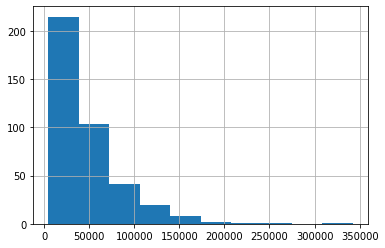

In [11]:
posts_df.likes.hist()

In [12]:
posts_df.cantidad_comentarios.describe()

count    393.000000
mean      20.590331
std        4.369725
min        3.000000
25%       19.000000
50%       22.000000
75%       24.000000
max       24.000000
Name: cantidad_comentarios, dtype: float64

In [13]:
def tipo_de_post(likes,cota_inf,cota_sup):

  if likes < cota_inf:
    return "malo"
  elif  likes > cota_sup:
    return "bueno"
  else:
    return "normal"  


porcentiles = posts_df['likes'].describe()

porcentil_25 = porcentiles['25%']
porcentil_75 = porcentiles['75%']



posts_df['tipo_de_post'] = posts_df['likes'].apply(lambda x : tipo_de_post(x,porcentil_25,porcentil_75))

posts_df.head()

,account,account_id,post_id,post_text,post_timestamp,comments,likes,cantidad_comentarios,tipo_de_post
0,flgovrondesantis,1653578477036,2845452458431699826,Stopped by Gocki’s Restaurant & Retail in Hava...,2022-05-24 20:33:07,"[{'name': 'whoiselvigmichael', 'text': 'Hi gov...",10196,16,malo
1,flgovrondesantis,1653578477036,2845437737717685019,Our nearly $9 million investment in Gadsden Co...,2022-05-24 20:03:52,"[{'name': 'meaganlbarber', 'text': 'Why don’t ...",6748,24,malo
2,flgovrondesantis,1653578477036,2844705383474708862,Florida is providing $100 million to provide d...,2022-05-23 19:52:36,"[{'name': 'mamaskrammy', 'text': '👏👏👏👏🔥👏👏👏👏'},...",43308,24,normal
3,flgovrondesantis,1653578477036,2842360208151797587,"This Cuban Independence Day, we are proud to r...",2022-05-20 14:10:27,"[{'name': 'sandramarrero09', 'text': 'While he...",22316,22,normal
4,flgovrondesantis,1653578477036,2841928904734945716,"Thank you, Hub City Smokehouse & Grill, for ho...",2022-05-19 23:52:27,"[{'name': 'peggyjones2372', 'text': '👏👏👏😍'}, {...",13289,23,malo


In [14]:
posts_df.tipo_de_post.value_counts(normalize=True)

normal    0.501272
malo      0.249364
bueno     0.249364
Name: tipo_de_post, dtype: float64

###  NLP para posts 

#### Funciones

In [15]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 15.1 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=f197003424c2228cca260da0bffc6c427557a65aa5dba18031b956d2f94cbdeb
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [16]:
#!pip install emoji
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


from nltk.tokenize import word_tokenize
nltk.download('punkt')

import emoji


import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer

#### Funciones

#Queda quitar numeros simbolos  pasar todo a minusculas
def preprocesaminto_NLP(text):

    wnl = WordNetLemmatizer()

    word_tokens = word_tokenize(text)
    # se quitan stop words
    t = [token for token in word_tokens if token.lower() not in stopwords.words("english")]
    
    # se genera la lematizacion se normaliza tiempos de vervo plurales etc
    lemmatized_string = ' '.join([wnl.lemmatize(words) for words in t])

    #word_tokens = ' '.join(lemmatized_string)

    return lemmatized_string



def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])    


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [17]:
text= "the mens is sitting with the bats on the striped mat under many flying geese"

word_tokens = word_tokenize(text)
word_tokens
wnl = WordNetLemmatizer()

lemmatized_string = ' '.join([wnl.lemmatize(words) for words in word_tokens])

lemmatized_string

'the men is sitting with the bat on the striped mat under many flying goose'

In [18]:
preprocesaminto_NLP('This is a samples sentence')

'sample sentence'

In [19]:
import emoji

def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])


  

In [20]:
#!pip install emoji

In [21]:
extract_emojis('👏👏👏 giu 😍 hi ')

'👏👏👏😍'

#### Aplicacion funciones

In [22]:
posts_df.head(2)

,account,account_id,post_id,post_text,post_timestamp,comments,likes,cantidad_comentarios,tipo_de_post
0,flgovrondesantis,1653578477036,2845452458431699826,Stopped by Gocki’s Restaurant & Retail in Hava...,2022-05-24 20:33:07,"[{'name': 'whoiselvigmichael', 'text': 'Hi gov...",10196,16,malo
1,flgovrondesantis,1653578477036,2845437737717685019,Our nearly $9 million investment in Gadsden Co...,2022-05-24 20:03:52,"[{'name': 'meaganlbarber', 'text': 'Why don’t ...",6748,24,malo


In [23]:
posts_df['post_procesado'] = posts_df['post_text'].apply(preprocesaminto_NLP)
posts_df['post_emojis'] = posts_df['post_text'].apply(extract_emojis)
posts_df.head()

,account,account_id,post_id,post_text,post_timestamp,comments,likes,cantidad_comentarios,tipo_de_post,post_procesado,post_emojis
0,flgovrondesantis,1653578477036,2845452458431699826,Stopped by Gocki’s Restaurant & Retail in Hava...,2022-05-24 20:33:07,"[{'name': 'whoiselvigmichael', 'text': 'Hi gov...",10196,16,malo,Stopped Gocki ’ Restaurant & Retail Havana . f...,
1,flgovrondesantis,1653578477036,2845437737717685019,Our nearly $9 million investment in Gadsden Co...,2022-05-24 20:03:52,"[{'name': 'meaganlbarber', 'text': 'Why don’t ...",6748,24,malo,nearly $ 9 million investment Gadsden County b...,
2,flgovrondesantis,1653578477036,2844705383474708862,Florida is providing $100 million to provide d...,2022-05-23 19:52:36,"[{'name': 'mamaskrammy', 'text': '👏👏👏👏🔥👏👏👏👏'},...",43308,24,normal,Florida providing $ 100 million provide paymen...,
3,flgovrondesantis,1653578477036,2842360208151797587,"This Cuban Independence Day, we are proud to r...",2022-05-20 14:10:27,"[{'name': 'sandramarrero09', 'text': 'While he...",22316,22,normal,"Cuban Independence Day , proud recognize Freed...",
4,flgovrondesantis,1653578477036,2841928904734945716,"Thank you, Hub City Smokehouse & Grill, for ho...",2022-05-19 23:52:27,"[{'name': 'peggyjones2372', 'text': '👏👏👏😍'}, {...",13289,23,malo,"Thank , Hub City Smokehouse & Grill , hosting ...",


In [24]:
posts_df['post_emojis'].unique()

array(['', '🐊', '👍🏻', '🔵🔵', '🥩', '🚔🚒🚑', '⚡', '✔✔✔✔'], dtype=object)

In [25]:
posts_df['post_procesado'].head()

0    Stopped Gocki ’ Restaurant & Retail Havana . f...
1    nearly $ 9 million investment Gadsden County b...
2    Florida providing $ 100 million provide paymen...
3    Cuban Independence Day , proud recognize Freed...
4    Thank , Hub City Smokehouse & Grill , hosting ...
Name: post_procesado, dtype: object

### Visulizacion

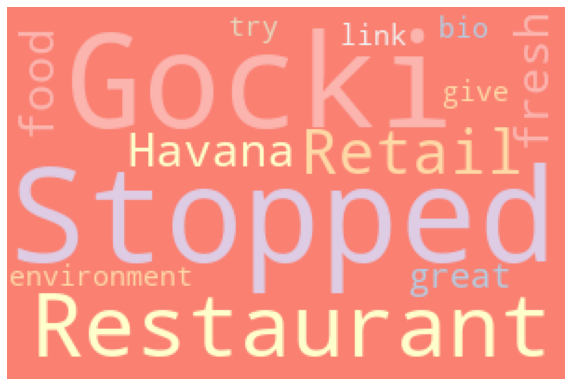

In [26]:
#https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");


# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 300, height = 200, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(posts_df['post_procesado'][0])
# Plot
plot_cloud(wordcloud)    




In [27]:
# tomamos el texto de todos las publicaciones

text= ''

for i in posts_df['post_procesado']:
    text= text + i



print(len(text))



63874


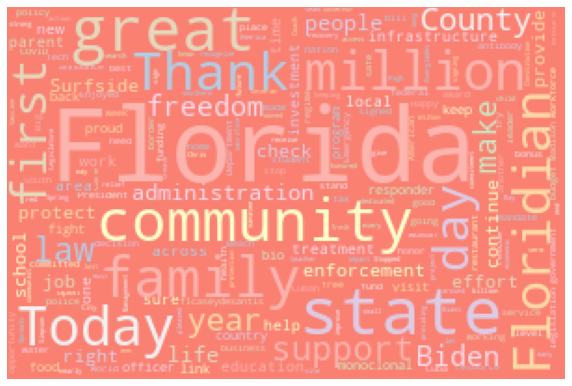

In [28]:
# Generate word cloud
wordcloud = WordCloud(width= 300, height = 200, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)    

### Pruebas segun tipo de post

In [29]:
posts_df.tipo_de_post.unique()

array(['malo', 'normal', 'bueno'], dtype=object)

In [30]:
posts_df_malos = posts_df.query('tipo_de_post == "malo"')
print(posts_df_malos.shape)
posts_df_buenos = posts_df.query('tipo_de_post == "bueno"')
print(posts_df_buenos.shape)
posts_df_normal = posts_df.query('tipo_de_post == "normal"')
print(posts_df_normal.shape)

(98, 11)
(98, 11)
(197, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


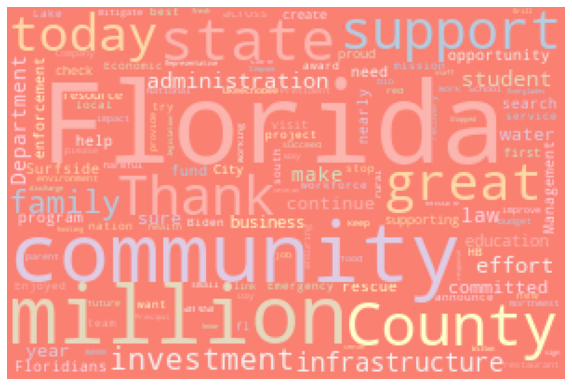

In [31]:

posts_df_malos['post_procesado'] = posts_df_malos['post_text'].apply(preprocesaminto_NLP)
posts_df_malos['post_emojis'] = posts_df_malos['post_text'].apply(extract_emojis)

text_malos= ''

for i in posts_df_malos['post_procesado']:
    text_malos= text_malos + i

# Generate word cloud
wordcloud = WordCloud(width= 300, height = 200, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text_malos)
# Plot
plot_cloud(wordcloud)   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


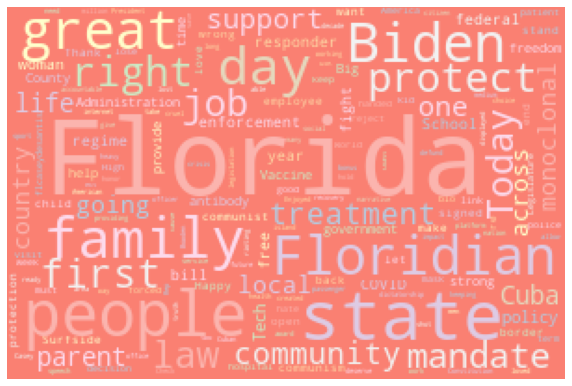

In [32]:
posts_df_buenos['post_procesado'] = posts_df_buenos['post_text'].apply(preprocesaminto_NLP)
posts_df_buenos['post_emojis'] = posts_df_buenos['post_text'].apply(extract_emojis)

text_buenos = ''

for i in posts_df_buenos['post_procesado']:
    text_buenos= text_buenos + i

# Generate word cloud
wordcloud = WordCloud(width= 300, height = 200, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text_buenos)
# Plot
plot_cloud(wordcloud)   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


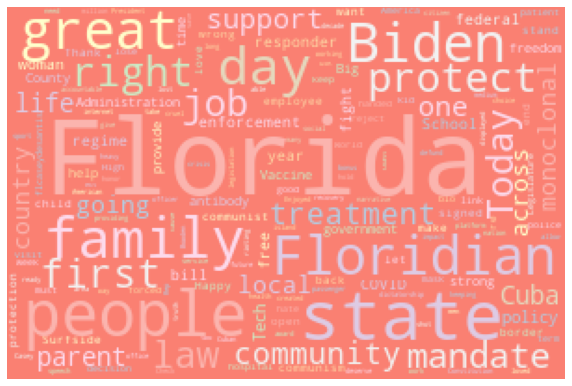

In [33]:
posts_df_buenos['post_procesado'] = posts_df_buenos['post_text'].apply(preprocesaminto_NLP)
posts_df_buenos['post_emojis'] = posts_df_buenos['post_text'].apply(extract_emojis)

text_buenos = ''

for i in posts_df_buenos['post_procesado']:
    text_buenos= text_buenos + i

# Generate word cloud
wordcloud = WordCloud(width= 300, height = 200, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text_buenos)
# Plot
plot_cloud(wordcloud)   

### Obtener las palabras mas frecuentes  segun tipo de posteo

In [34]:
from collections import Counter


split_it = text_buenos.split()
  

Counter = Counter(split_it)
  

most_occur = Counter.most_common(10)
  
print(most_occur)

[(',', 113), ('.', 109), ('’', 55), ('Florida', 52), ('state', 18), ('people', 16), ('family', 14), ('.Florida', 13), ('Biden', 13), ('@', 12)]


In [35]:
from collections import Counter
split_it = text_malos.split()
  

Counter = Counter(split_it)
  

most_occur = Counter.most_common(10)
  
print(most_occur)

[(',', 120), ('.', 92), ('Florida', 55), ('’', 42), ('million', 30), ('community', 29), ('$', 25), ('County', 20), ('state', 20), ('support', 19)]


### Modelos

In [36]:
!pip install -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [39]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Y’all clearly don’t give a damn about y’all kids.. sick af smh.")

{'compound': -0.6808, 'neg': 0.461, 'neu': 0.389, 'pos': 0.15}

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

Since VADER is pretrained, you can get results more quickly than with many other analyzers. However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It’s less accurate when rating longer, structured sentences, but it’s often a good launching point.
https://www.nltk.org/howto/sentiment.html


**Compund va de -1 a 1 donde 1 es positivo y -1 negativo
O se puede usar neg neu y post que suman 1
Son dos formas que usa para calcular el sentimiento**